# In this particular session, we will build different models on the Training Data and then go on to check the accuracy (or error) on the training and test data. The model which performs the best on the test data is an optimum model for us.

# Case Study - We are going to analyse and predict the monthly sales of a particular store. The data that we have ranges from 2013 to 2017.

## Read the data as a monthly Time Series from the '.csv' file.

Now, we have our data ready for the Time Series Analysis.

## Plot the Time Series to understand the behaviour of the data

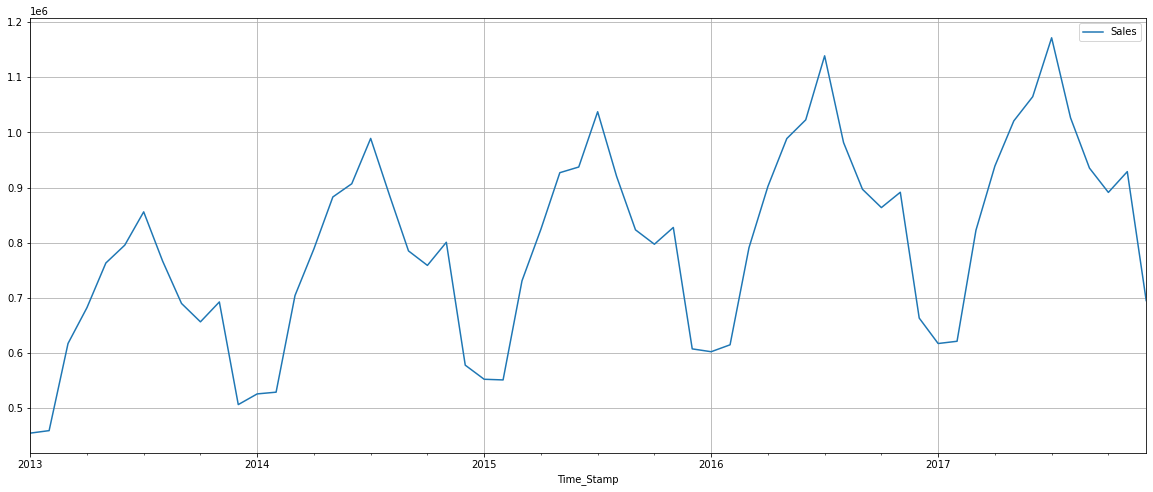

In [11]:
## Plotting the same graph from the second dataframe with the date-time modifications

df.plot(figsize=(20,8))
plt.grid();

There seems to be a trend with a seasonality as well.

## Check the basic measures of descriptive statistics of the Time Series

In [12]:
round(df.describe(),3)

,Sales
count,60.000
mean,795075.200
std,172901.778
min,454904.000
25%,661705.000
50%,799018.000
75%,922026.250
max,1171393.000


## Plot a boxplot to understand the spread of sales across different years and within different months across years.

### Yearly Boxplot

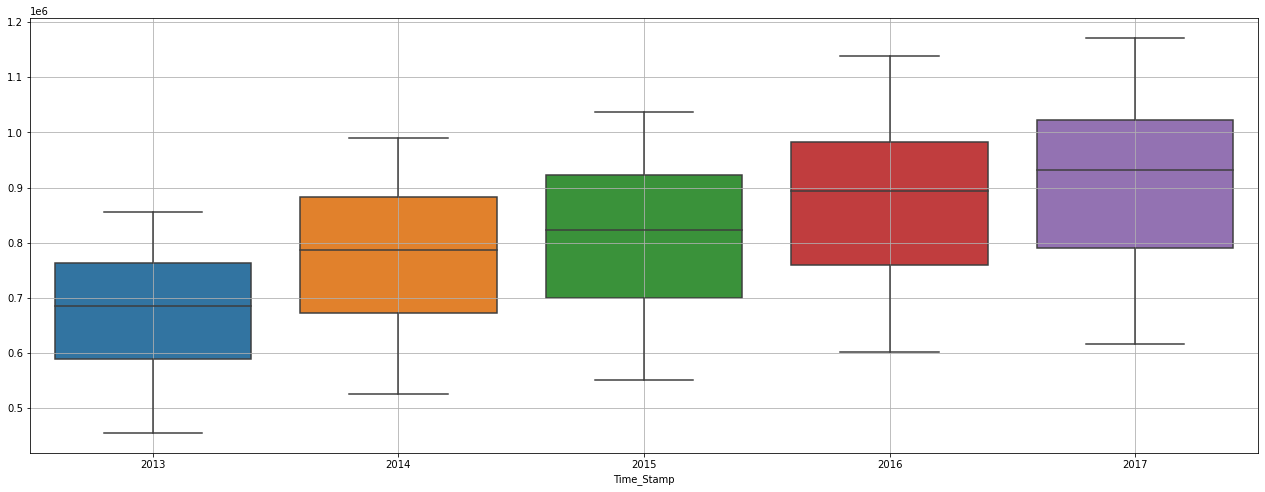

In [13]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

### Monthly Boxplot

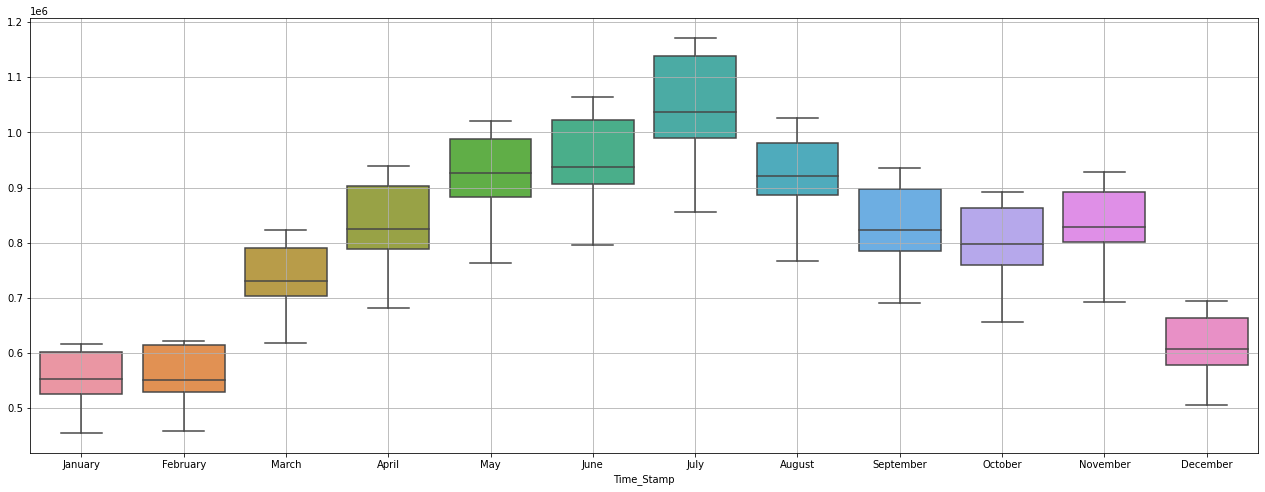

In [14]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

We see that there is maximum sales in the month of July.

## Plot a graph of monthly sales across years.

In [15]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sales', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
2013,682274,766761,506607,459417,454904,855922,795597,617382,763242,692643,656587,689907
2014,788914,885596,578048,529117,525987,989010,906842,704301,882877,800783,758883,785124
2015,824467,920401,607572,551317,552513,1037350,937184,730951,926902,827645,797253,823332
2016,901950,981494,663411,614957,602439,1138718,1022664,790881,988730,891448,863637,896831
2017,938862,1026403,695170,621369,617306,1171393,1064624,822667,1020686,928837,891160,935263


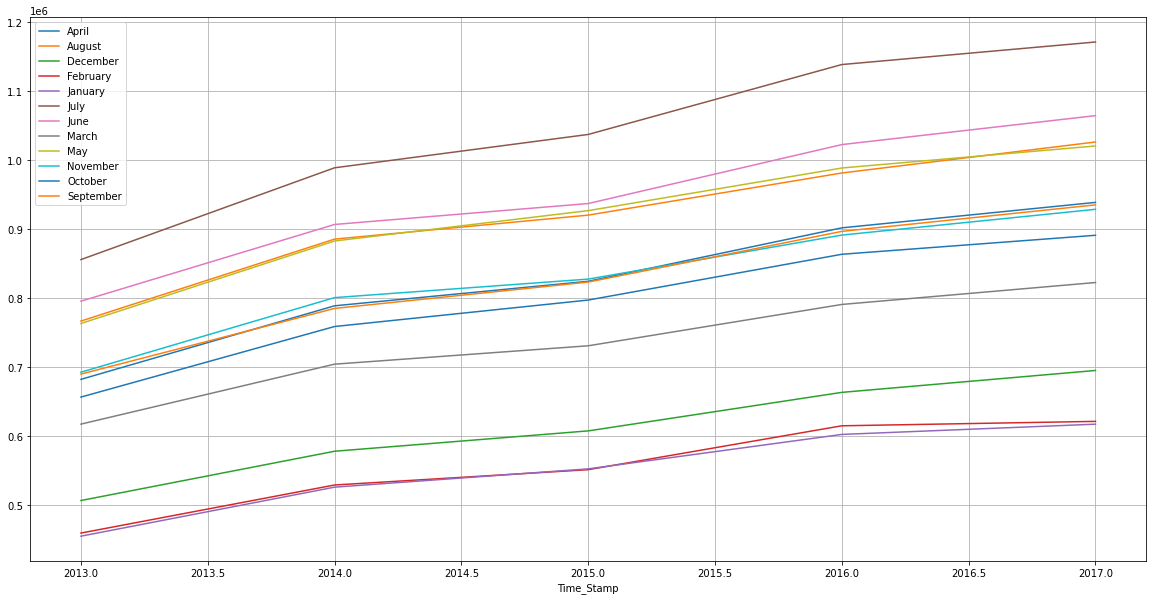

In [16]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

From the graph also, we can conclude that July has the highest sales across years.

## Decompose the Time Series

In [17]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

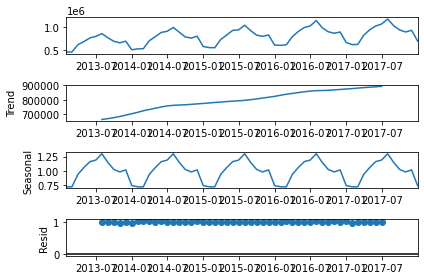

## Split the data into train and test and plot the training and test data.

In [20]:
train    =   df[0:int(len(df)*0.7)] 
test     =   df[int(len(df)*0.7):]

In [21]:
print(train.shape)
print(test.shape)

(42, 1)
(18, 1)


In [22]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Sales
Time_Stamp        
2013-01-31  454904
2013-02-28  459417
2013-03-31  617382
2013-04-30  682274
2013-05-31  763242 

Last few rows of Training Data 
               Sales
Time_Stamp         
2016-02-29   614957
2016-03-31   790881
2016-04-30   901950
2016-05-31   988730
2016-06-30  1022664 

First few rows of Test Data 
               Sales
Time_Stamp         
2016-07-31  1138718
2016-08-31   981494
2016-09-30   896831
2016-10-31   863637
2016-11-30   891448 

Last few rows of Test Data 
               Sales
Time_Stamp         
2017-08-31  1026403
2017-09-30   935263
2017-10-31   891160
2017-11-30   928837
2017-12-31   695170 



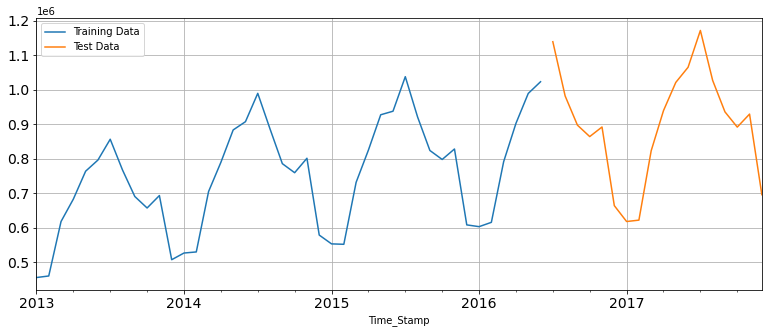

In [23]:
train['Sales'].plot(figsize=(13,5), fontsize=14)
test['Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

##### Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years.

# Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [24]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

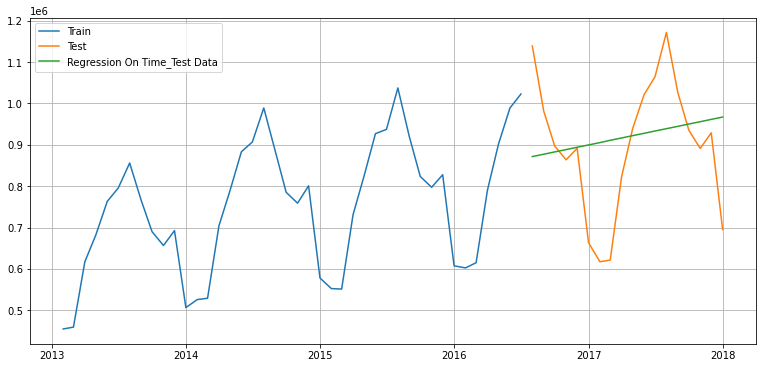

In [41]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Defining the accuracy metrics.

In [32]:
from sklearn import metrics

### Model Evaluation

In [34]:
## Test Data - RMSE



For RegressionOnTime forecast on the Test Data,  RMSE is 163404.817


,Test RMSE
RegressionOnTime,163404.817494


## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

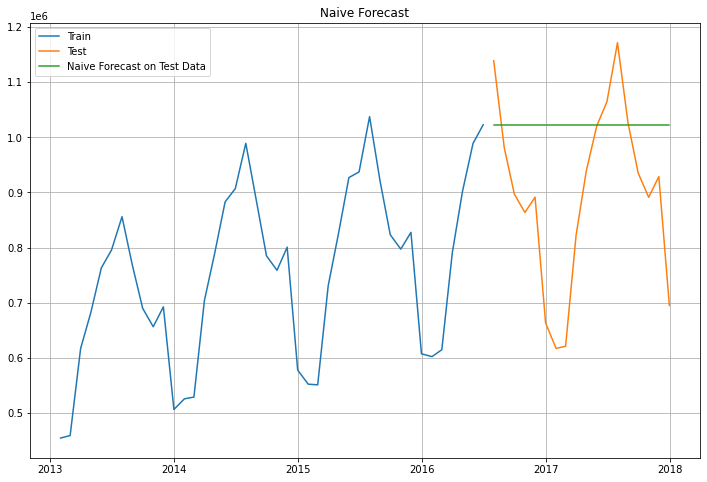

In [42]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [44]:
## Test Data - RMSE



For RegressionOnTime forecast on the Test Data,  RMSE is 202735.276


,Test RMSE
RegressionOnTime,163404.817494
NaiveModel,202735.276206


## Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

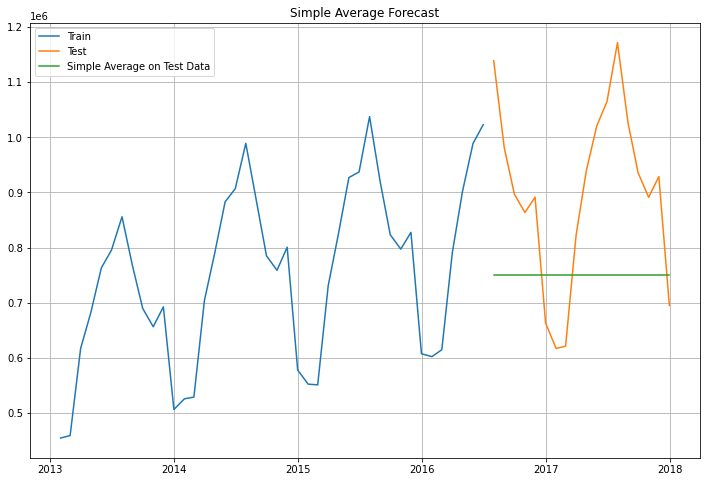

In [50]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [51]:
## Test Data - RMSE 



For Simple Average forecast on the Test Data,  RMSE is 217661.009


,Test RMSE
RegressionOnTime,163404.817494
NaiveModel,202735.276206
SimpleAverageModel,217661.008946


## Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

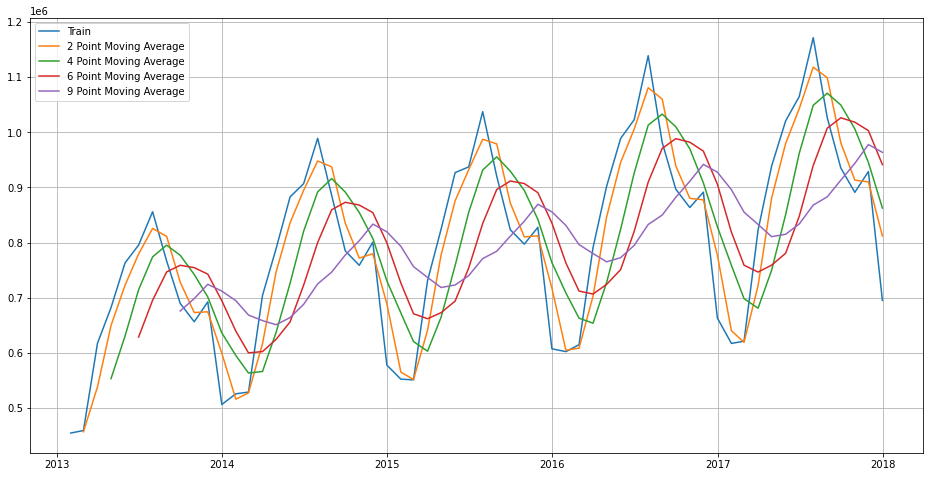

In [55]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

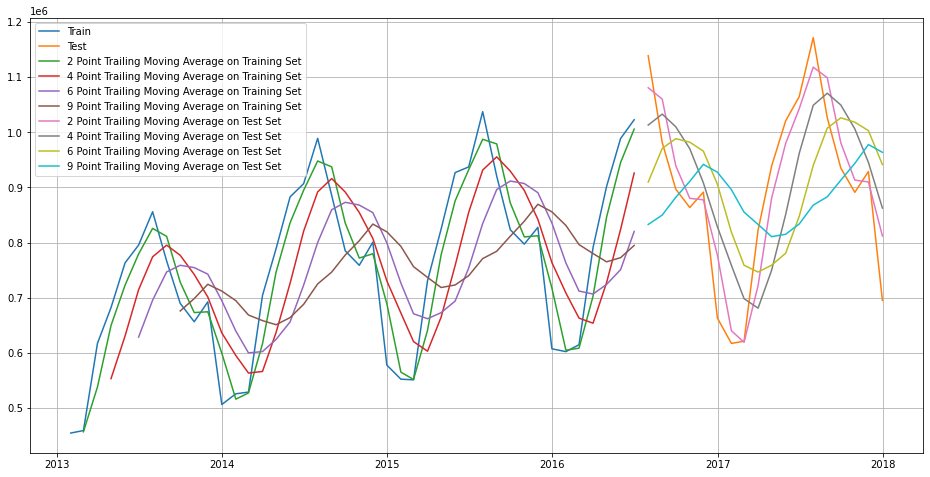

In [57]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

##### Done only on the test data.

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 60405.468
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 120837.916
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 164346.870
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 185658.328 


,Test RMSE
RegressionOnTime,163404.817494
NaiveModel,202735.276206
SimpleAverageModel,217661.008946
2pointTrailingMovingAverage,60405.468033
4pointTrailingMovingAverage,120837.915548
6pointTrailingMovingAverage,164346.870263
9pointTrailingMovingAverage,185658.327563


## Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

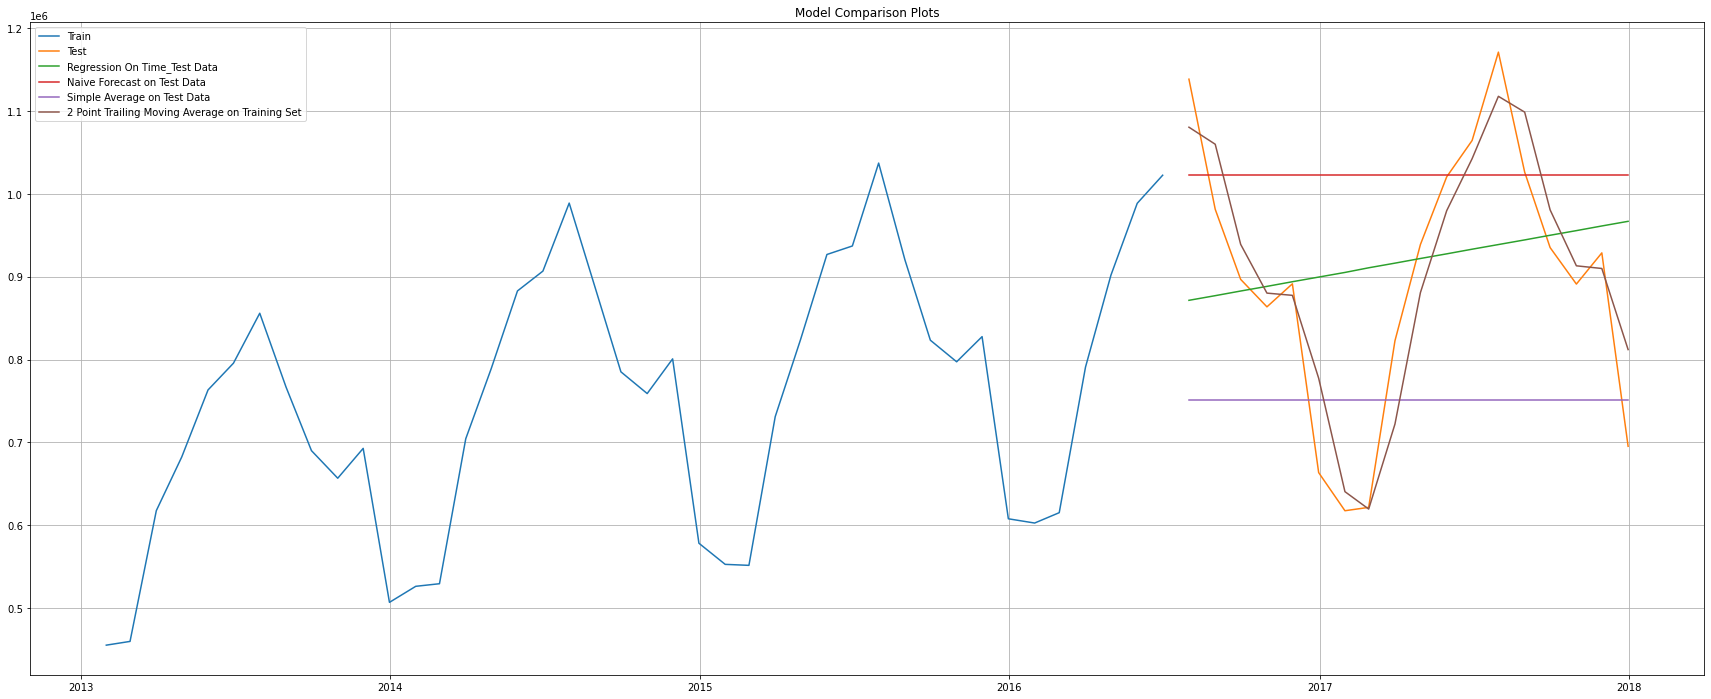

In [60]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 5: Simple Exponential Smoothing

In [61]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

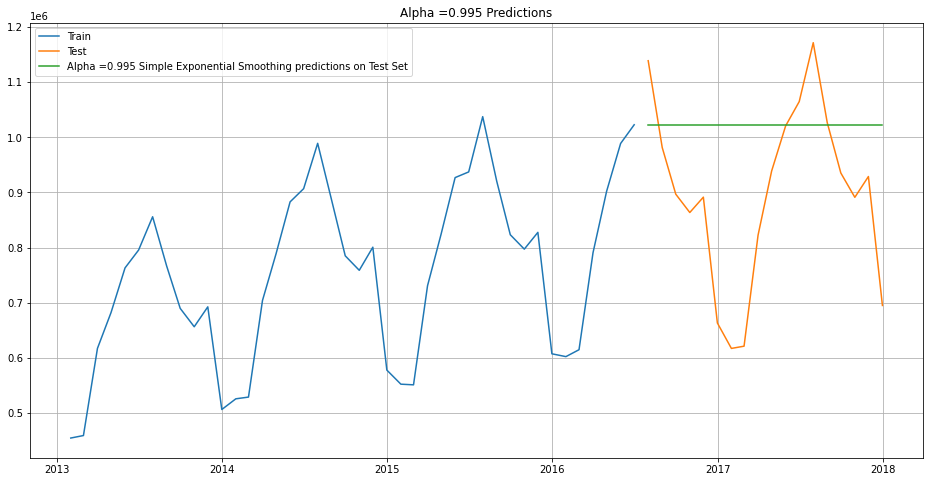

In [68]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

### Model Evaluation for $\alpha$ = 0.995 : Simple Exponential Smoothing

In [69]:
## Test Data



For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 202629.896


,Test RMSE
RegressionOnTime,163404.817494
NaiveModel,202735.276206
SimpleAverageModel,217661.008946
2pointTrailingMovingAverage,60405.468033
4pointTrailingMovingAverage,120837.915548
6pointTrailingMovingAverage,164346.870263
9pointTrailingMovingAverage,185658.327563
"Alpha=0.995,SimpleExponentialSmoothing",202629.895785


#### Setting different alpha values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

## Model Evaluation

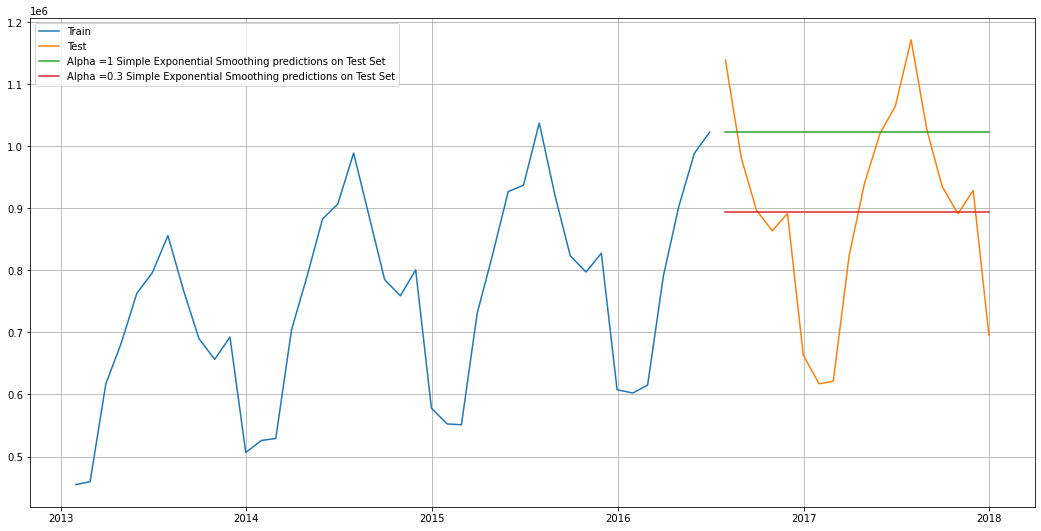

In [75]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

,Test RMSE
RegressionOnTime,163404.817494
NaiveModel,202735.276206
SimpleAverageModel,217661.008946
2pointTrailingMovingAverage,60405.468033
4pointTrailingMovingAverage,120837.915548
6pointTrailingMovingAverage,164346.870263
9pointTrailingMovingAverage,185658.327563
"Alpha=0.995,SimpleExponentialSmoothing",202629.895785
"Alpha=0.3,SimpleExponentialSmoothing",160159.157250


## Method 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

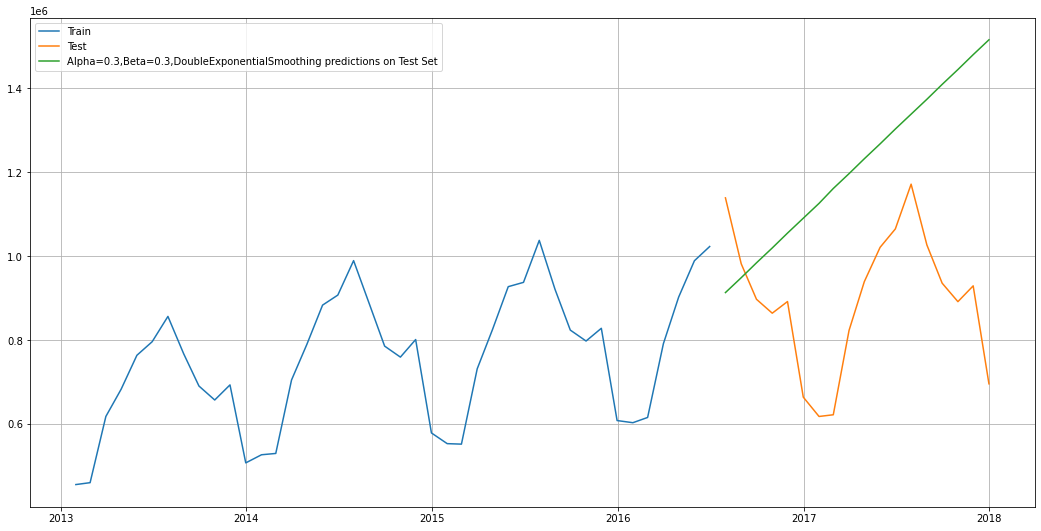

In [84]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

,Test RMSE
RegressionOnTime,163404.817494
NaiveModel,202735.276206
SimpleAverageModel,217661.008946
2pointTrailingMovingAverage,60405.468033
4pointTrailingMovingAverage,120837.915548
6pointTrailingMovingAverage,164346.870263
9pointTrailingMovingAverage,185658.327563
"Alpha=0.995,SimpleExponentialSmoothing",202629.895785
"Alpha=0.3,SimpleExponentialSmoothing",160159.157250
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",397412.927482


## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

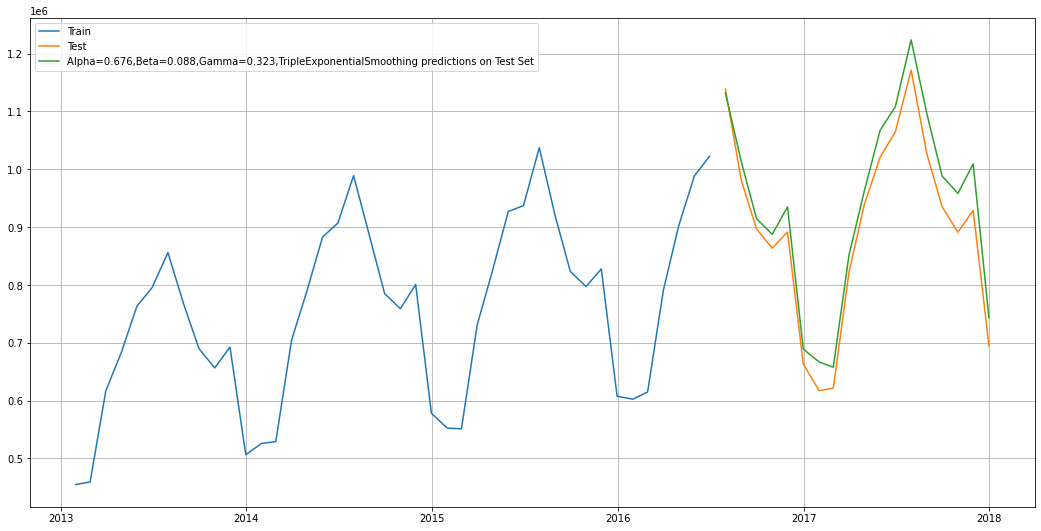

In [91]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [93]:
## Test Data



For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 45617.969


,Test RMSE
RegressionOnTime,163404.817494
NaiveModel,202735.276206
SimpleAverageModel,217661.008946
2pointTrailingMovingAverage,60405.468033
4pointTrailingMovingAverage,120837.915548
6pointTrailingMovingAverage,164346.870263
9pointTrailingMovingAverage,185658.327563
"Alpha=0.995,SimpleExponentialSmoothing",202629.895785
"Alpha=0.3,SimpleExponentialSmoothing",160159.157250
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",397412.927482


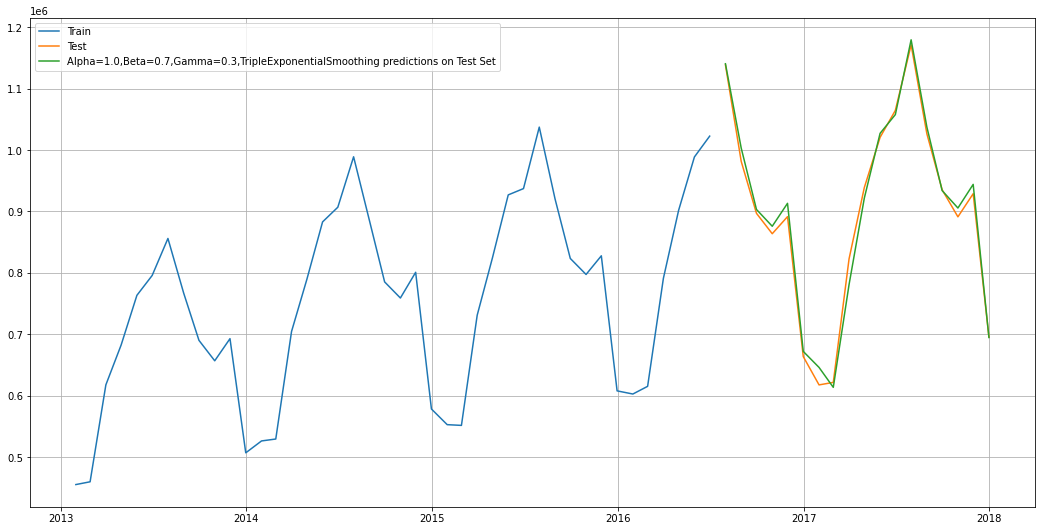

In [99]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 1.0000000000000002, 0.7000000000000002, 0.3], label='Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing",16412.236378
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",45617.969417
2pointTrailingMovingAverage,60405.468033
4pointTrailingMovingAverage,120837.915548
"Alpha=0.3,SimpleExponentialSmoothing",160159.157250
RegressionOnTime,163404.817494
6pointTrailingMovingAverage,164346.870263
9pointTrailingMovingAverage,185658.327563
"Alpha=0.995,SimpleExponentialSmoothing",202629.895785
NaiveModel,202735.276206


# END